<h1>Eigen-Emoji</h1>
<h3>Mark Rainey</h3>
<p>This is a demonstration of the Singular Value Decomposition performed on Emoji.</p>
<p>All emojis designed by <a href="https://openmoji.org/">OpenMoji</a> – the open-source emoji and icon project. License: <a href="https://creativecommons.org/licenses/by-sa/4.0/#">CC BY-SA 4.0</a></p>


<p>First, we will load our emoji and process them. This involves converting each to black and white, flattening into a column vector and sending it to the approriate Matrix column.</p>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image
import os

folder_path = r"c:/Users/raine/eigen-emoji/eigen_emoji/emoji"

#Set emoji dimensions
m = 72
n = 72
n_emoji = 154
n_test = 20
#Build matrix for storing Emoji in columns
emojis = np.zeros((m*n, n_emoji-n_test))
test_emojis = np.zeros(((m*n), n_test))
# Make sure to check if the images exist and are read correctly
for i in range(n_emoji - 1):
    file_path = os.path.join(folder_path, f"{i}")
    if os.path.exists(file_path):
        # Read the image data
        img_data = image.imread(file_path)
        # Check if the image is not empty or all zeros
        if np.any(img_data):
            # Convert to grayscale by taking the average across the color channels
            grayscale_image = np.mean(img_data[..., :3], axis=2)
            
            #Separate emoji into training and testing
            if i <= n_emoji - n_test - 1:
                emojis[:,i]= grayscale_image.reshape(-1)
            else:
                test_emojis[:,134-i]= grayscale_image.reshape(-1)
        else:
            print(f"Image at {file_path} is empty or all zeros.")
    else:
        print(f"File does not exist: {file_path}")

#Take average of all emojis
avgFace = np.mean(emojis, axis=1)

#Subtract the average emoji from all emoji, take SVD
X = emojis - np.tile(avgFace, (emojis.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)


<p>Now, we will display the average Emoji as well as our first Singular Value.</p>

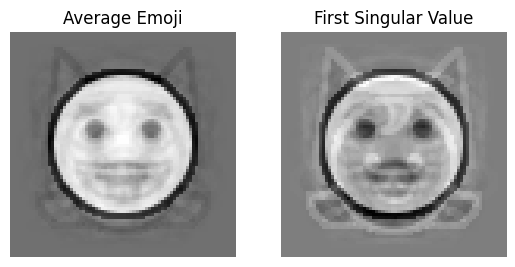

In [3]:
#Plot Average Emoji against First Singular Values
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.set_title('Average Emoji')
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)))
img_avg.set_cmap('gray')
plt.axis('off')
ax2 = fig1.add_subplot(122)
ax2.set_title('First Singular Value')
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)))
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

<p>U at different values of S</p>

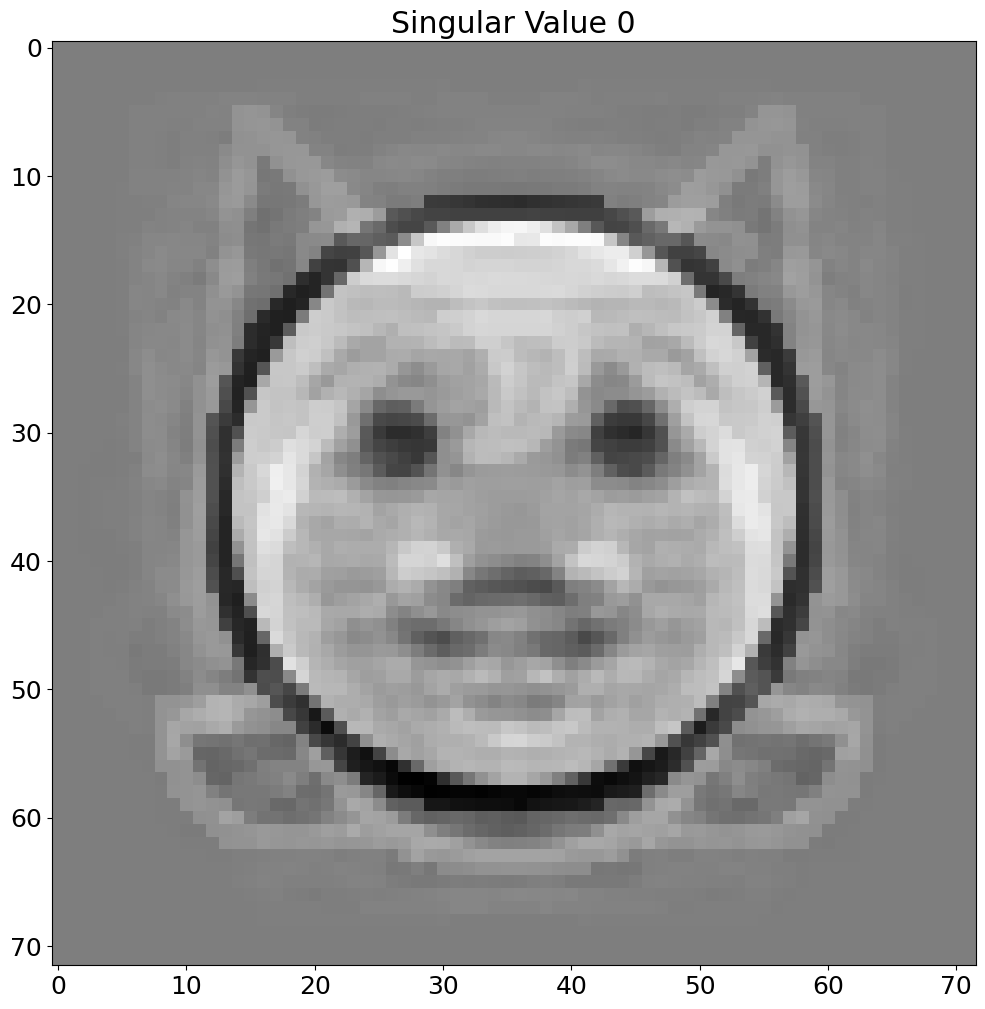

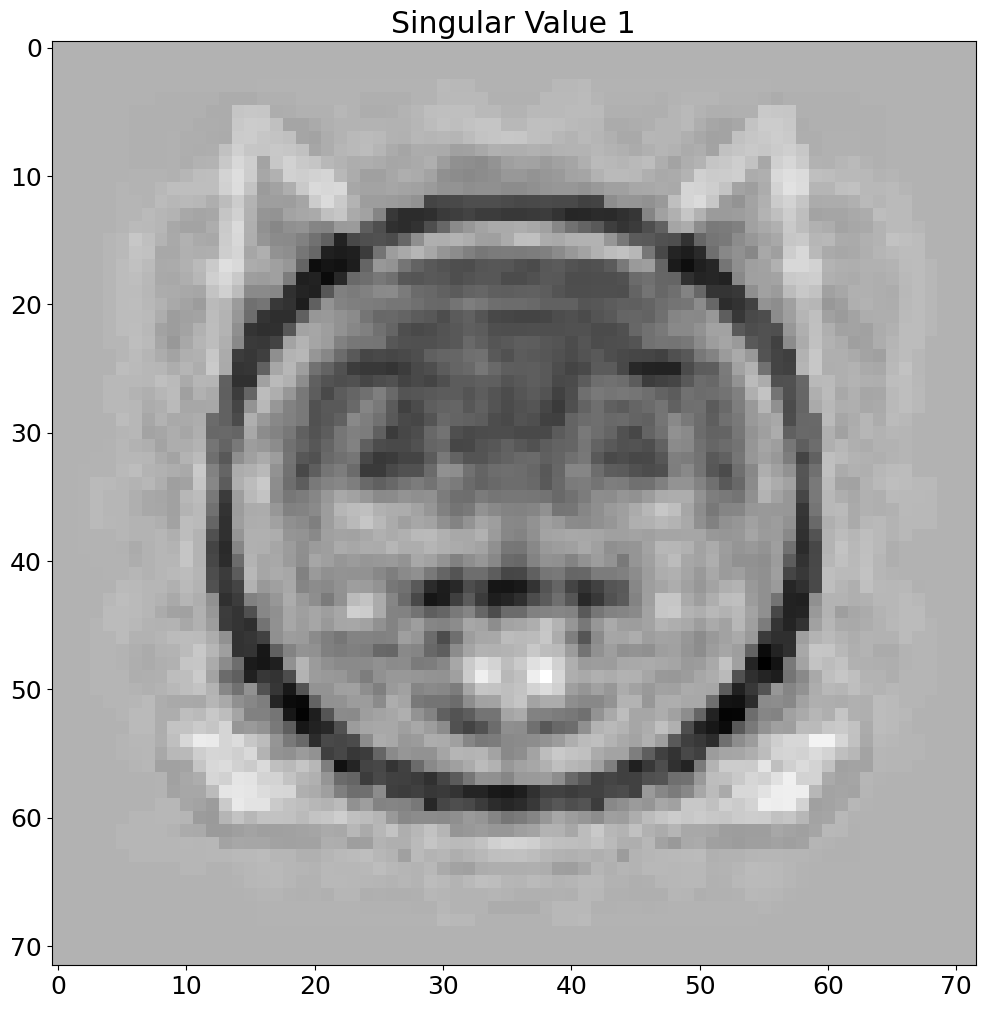

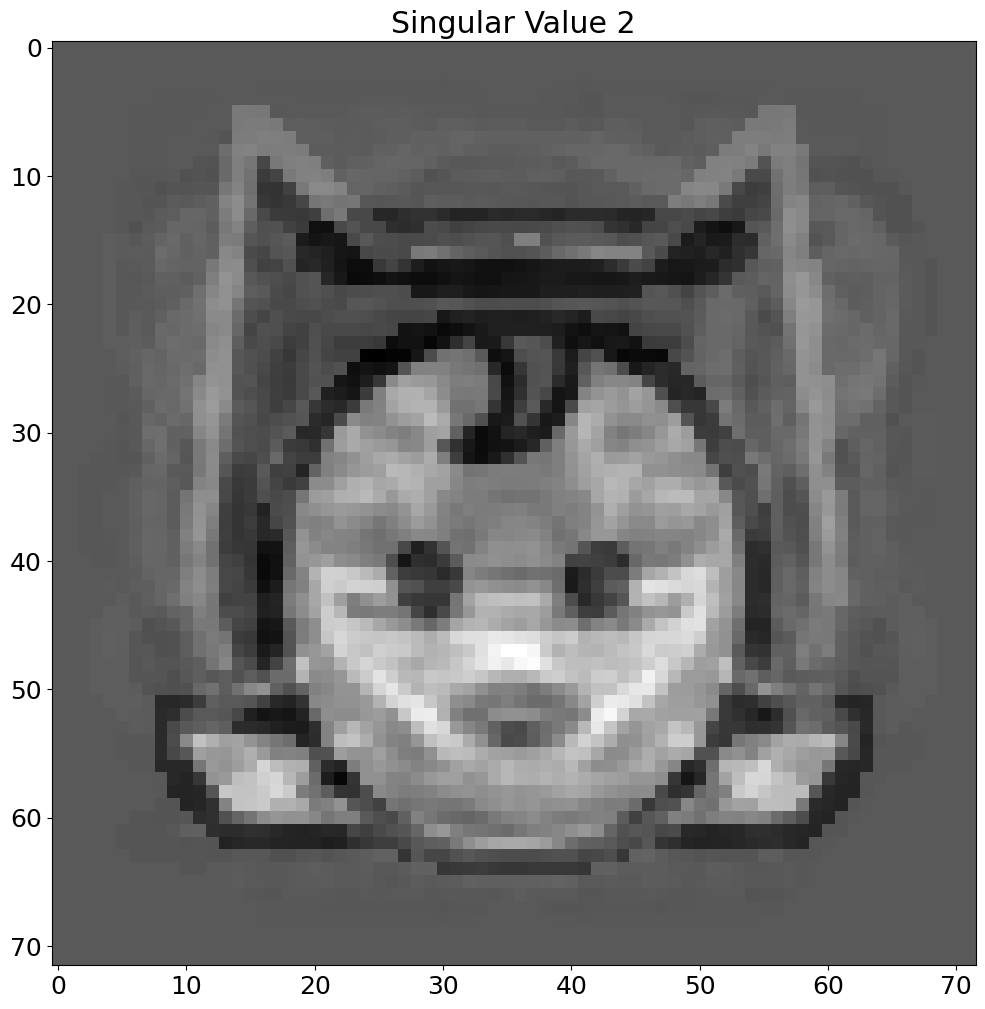

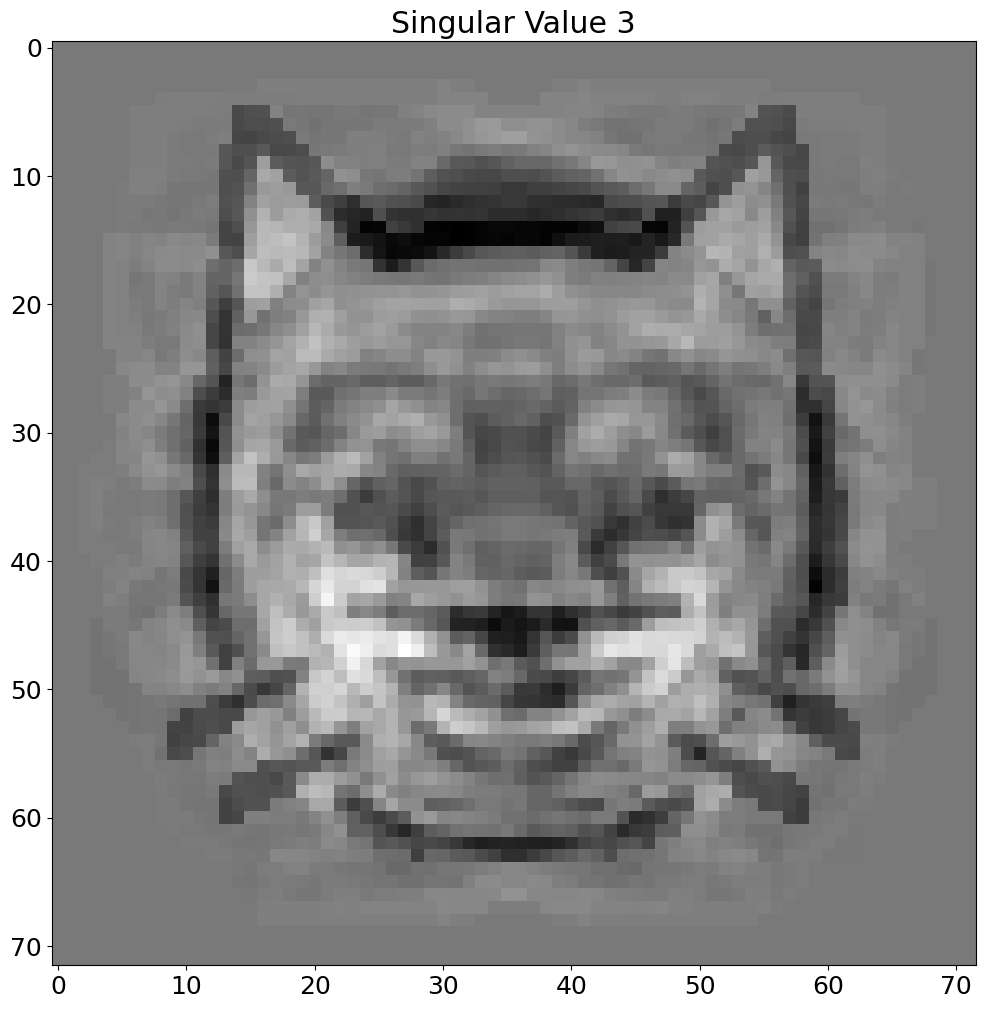

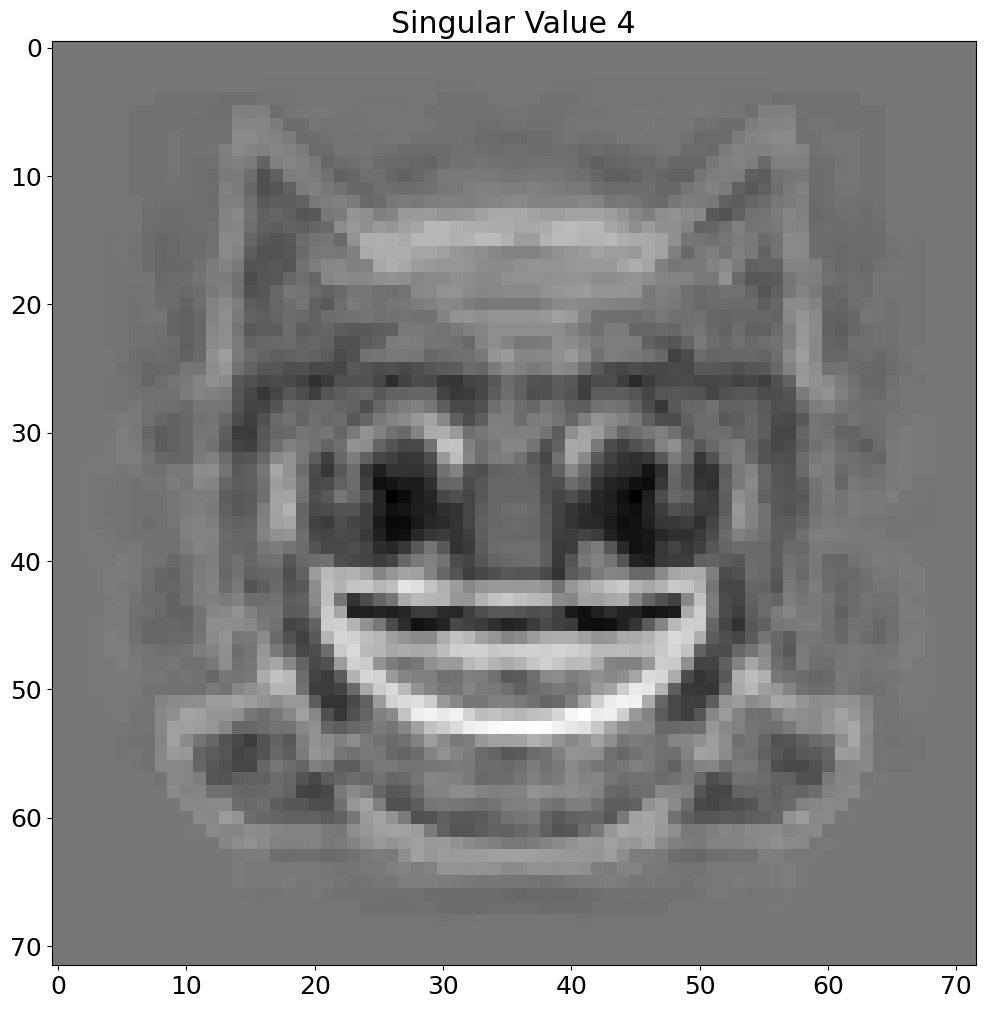

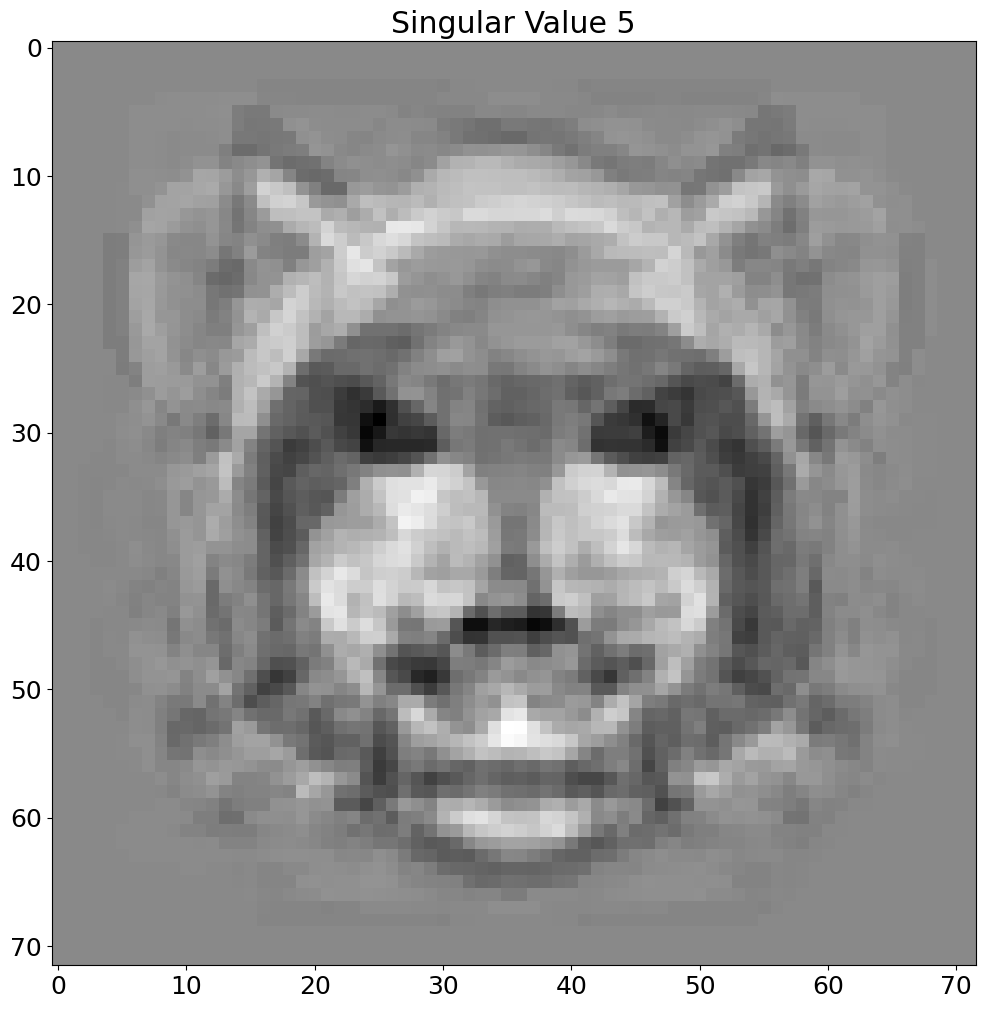

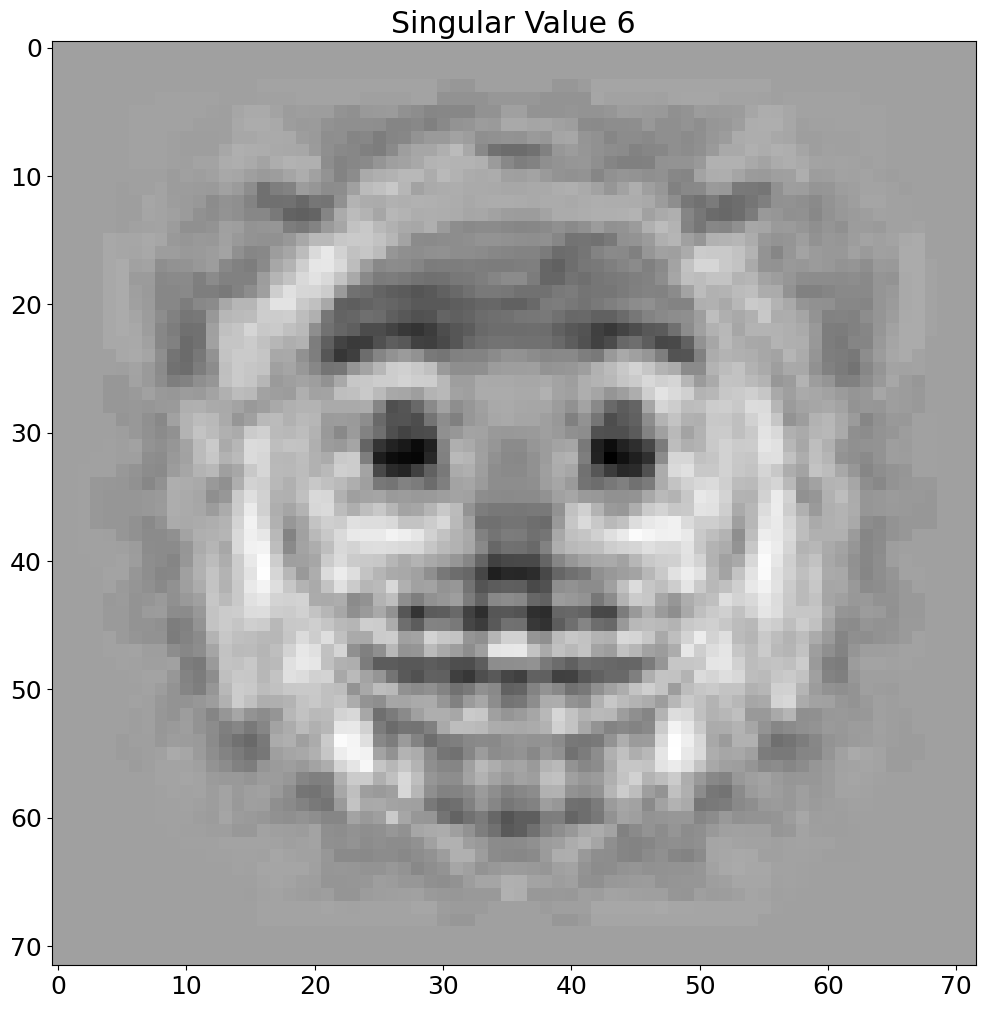

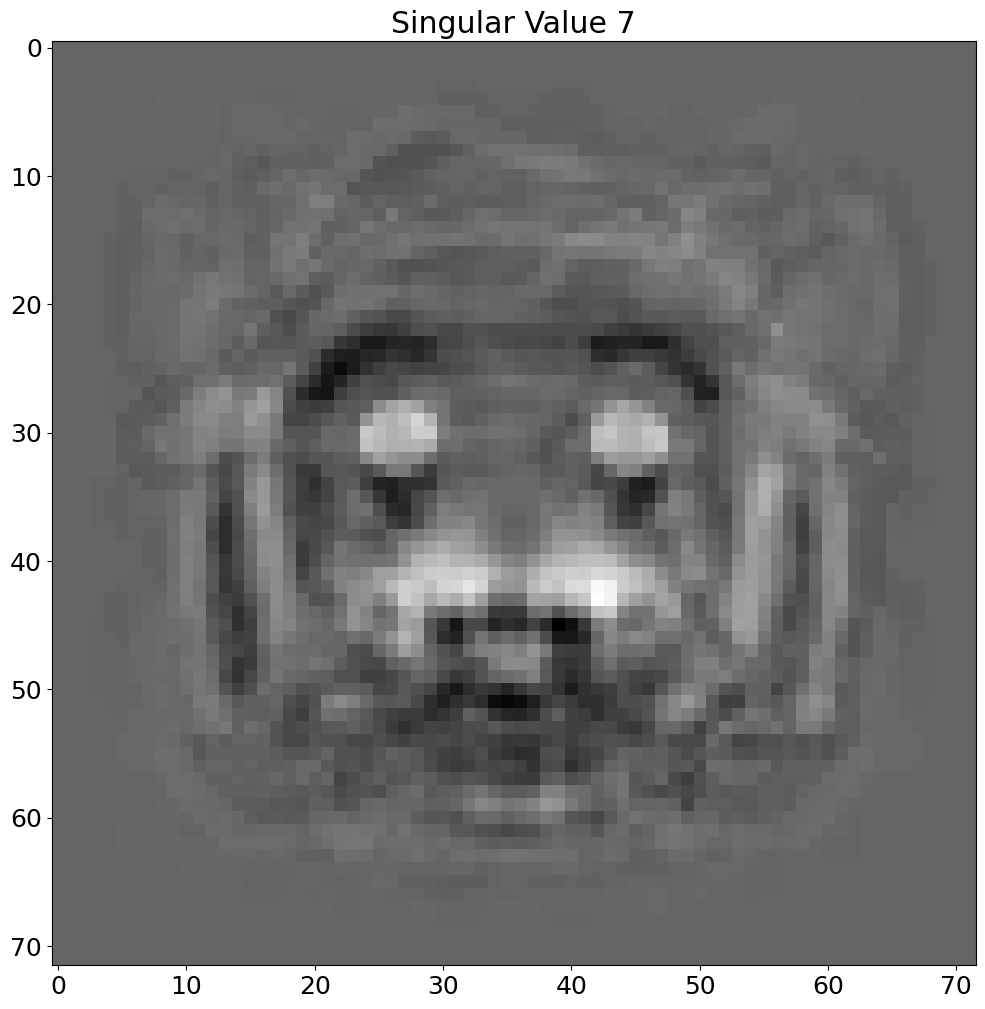

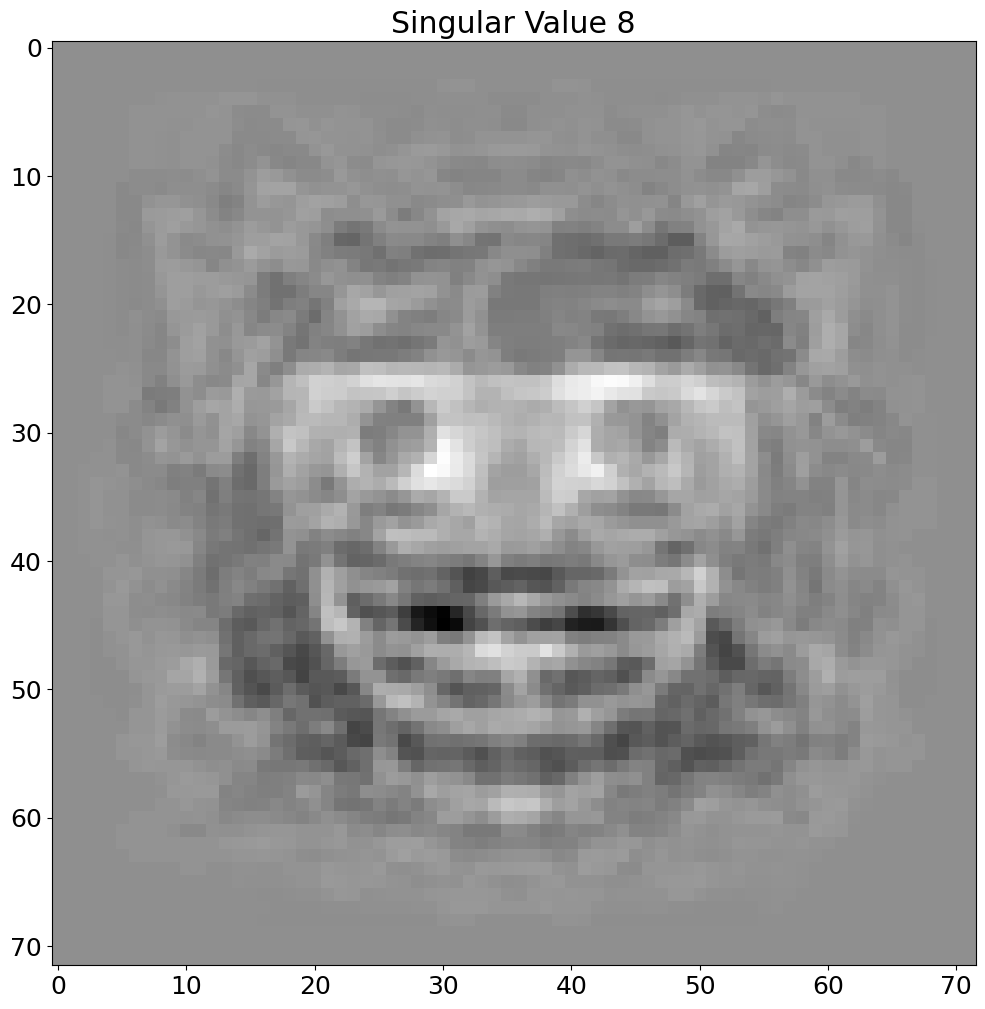

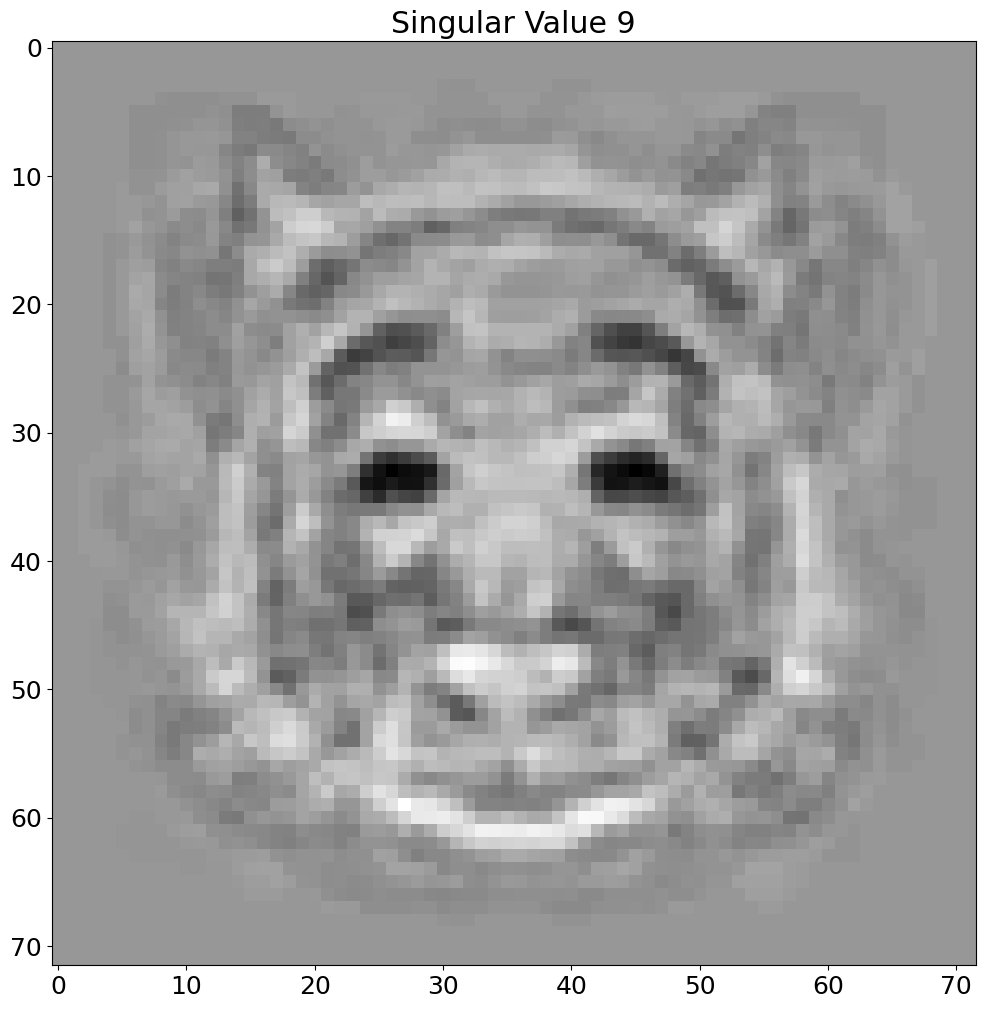

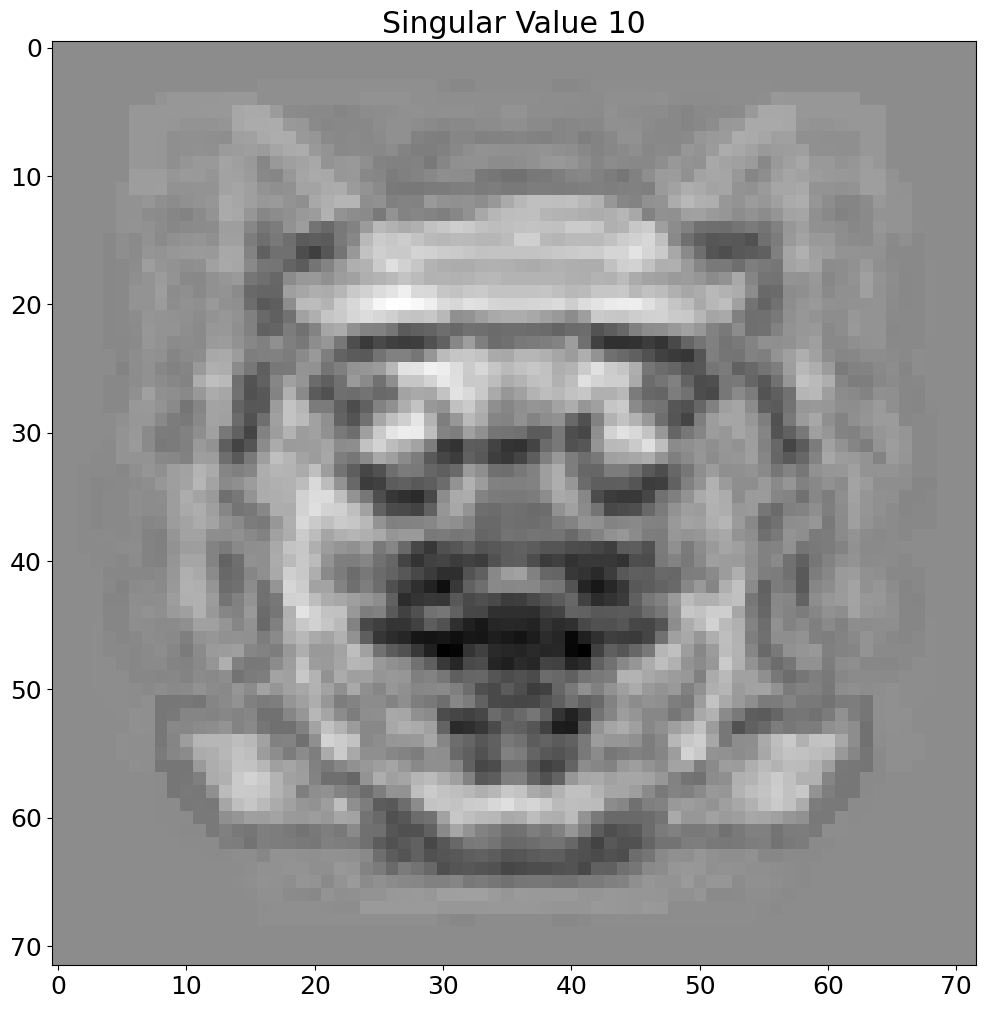

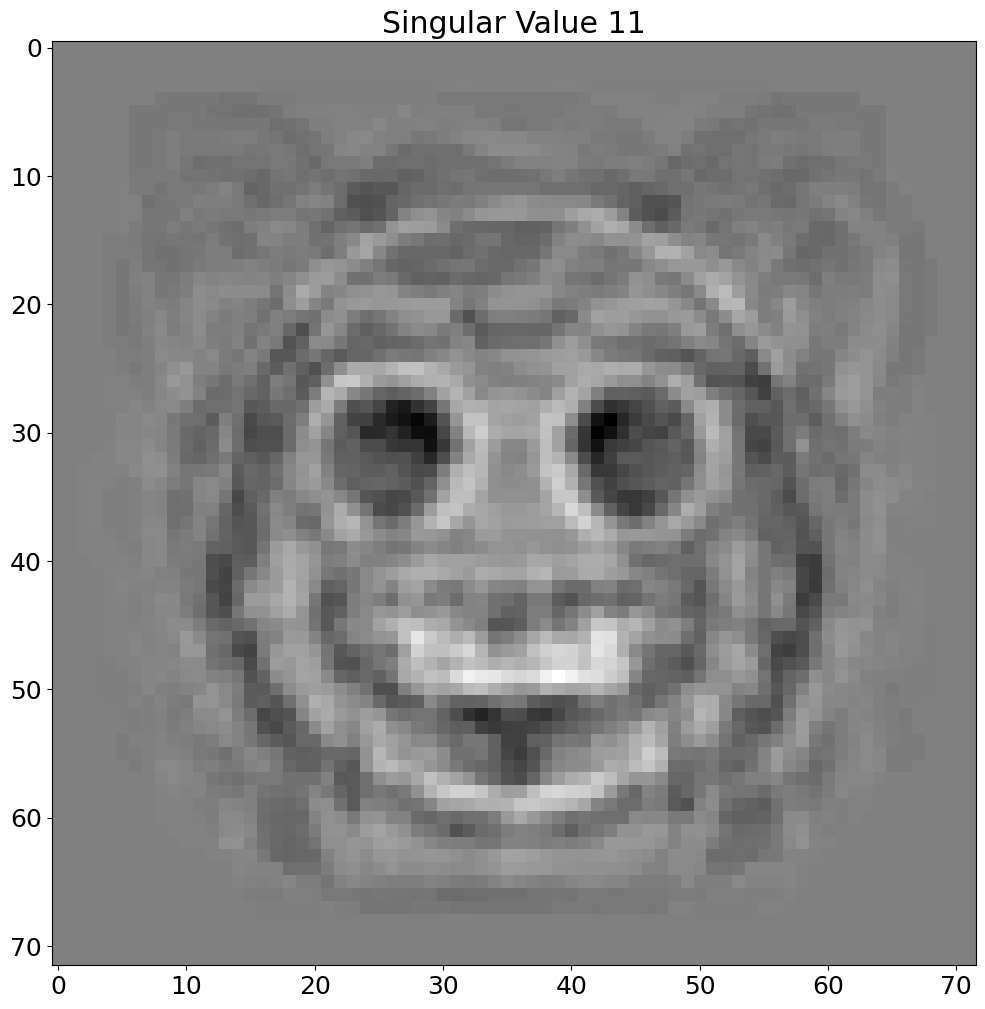

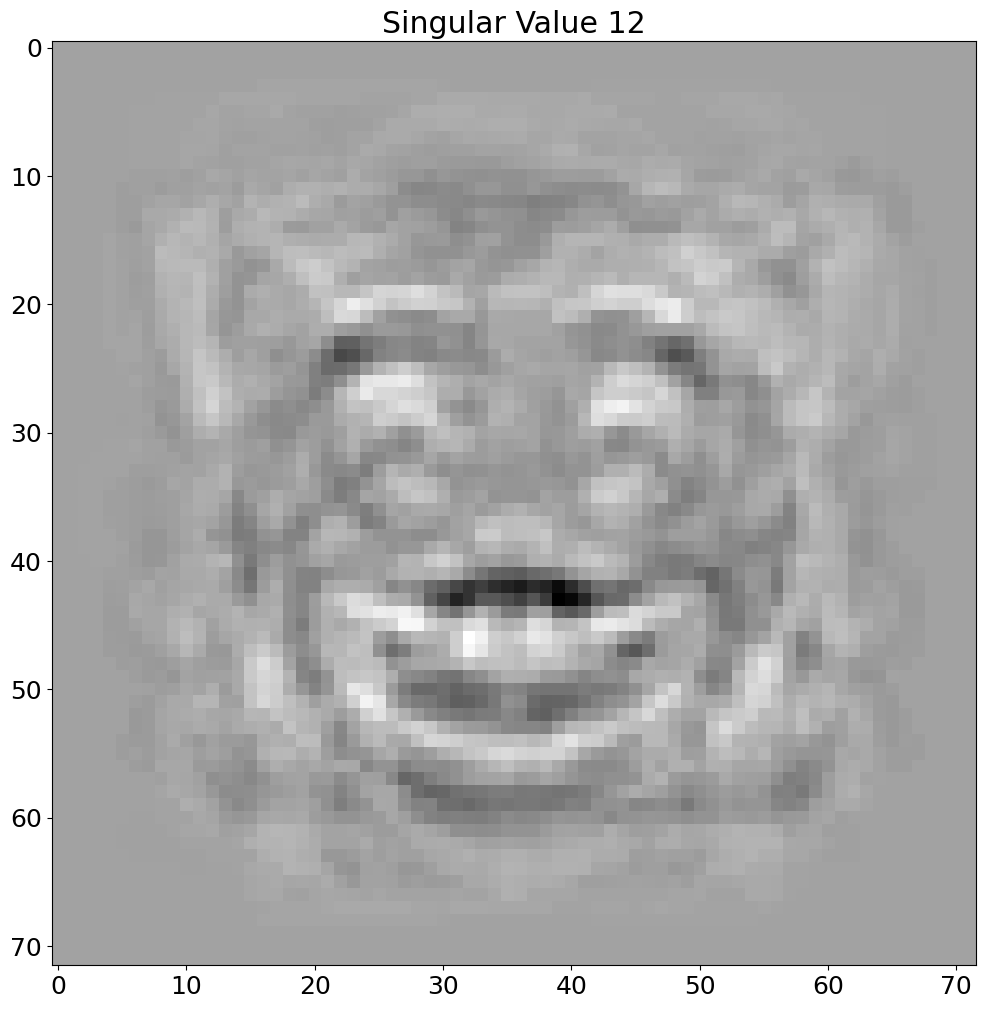

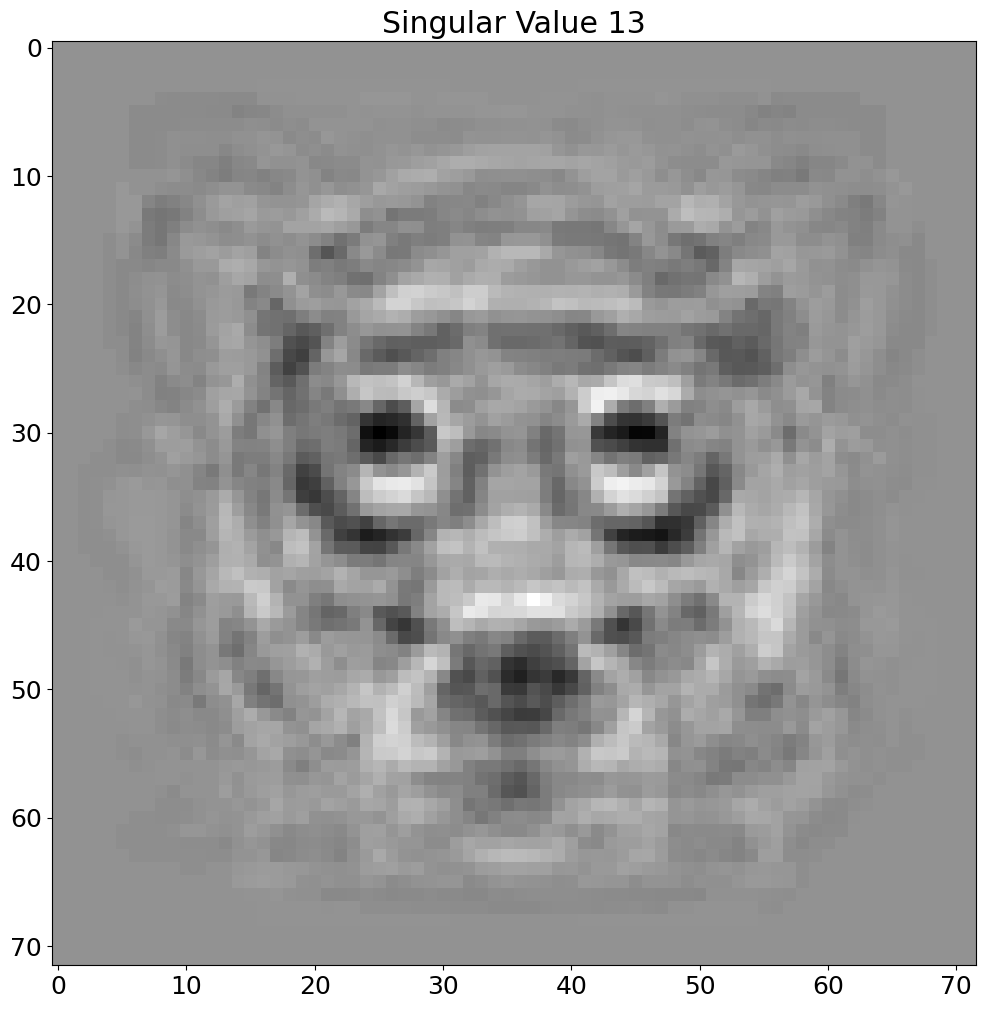

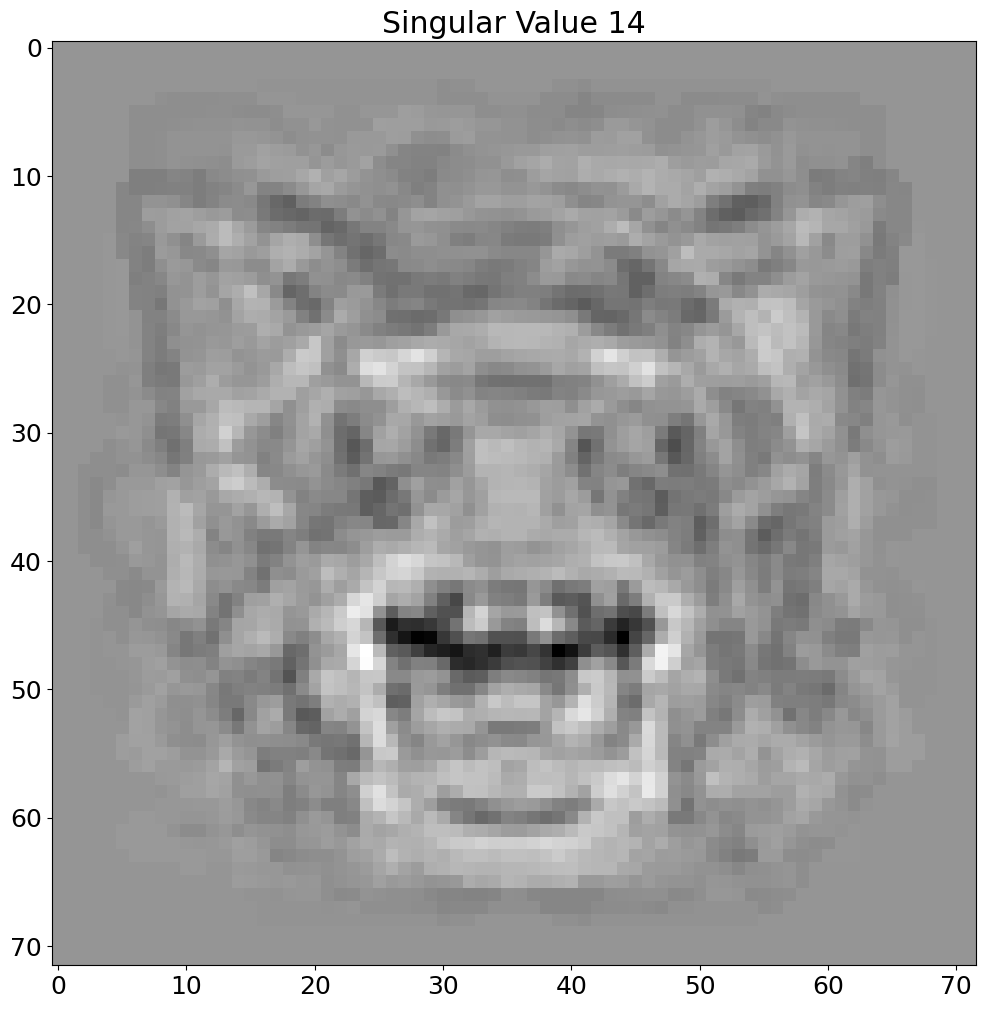

In [132]:
for S in range(0,15,1):
    plt.title(f'Singular Value {S}')
    plt.imshow(np.reshape(U[:,S],(m,n)), cmap='gray')
    plt.axis='off'
    plt.show()

<p> Let's reconstruct an emoji from our test dataset using only the data from training. </p>

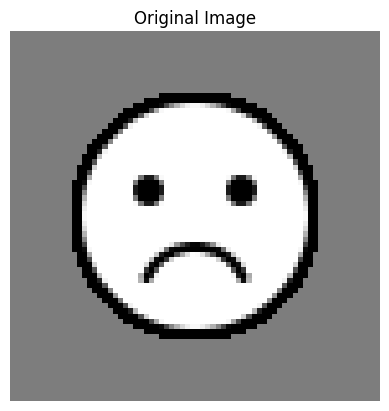

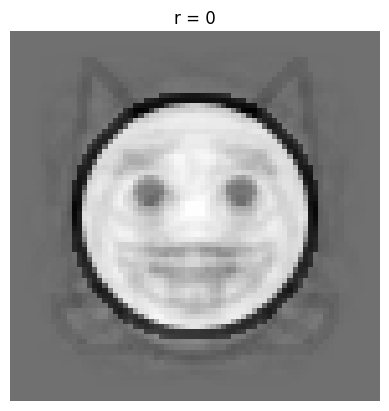

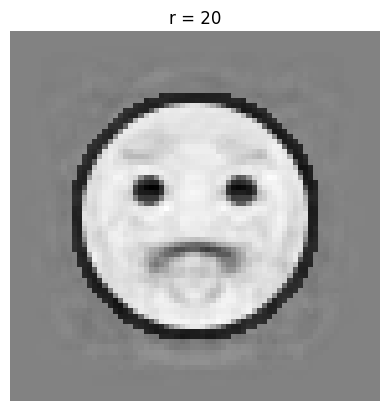

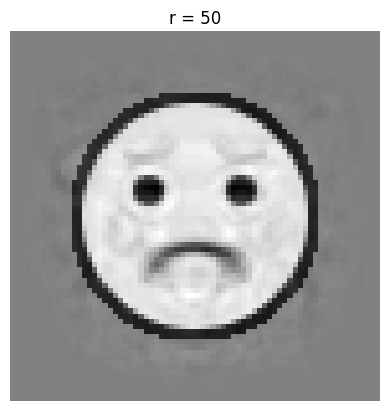

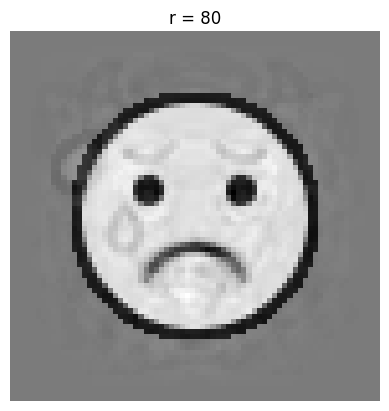

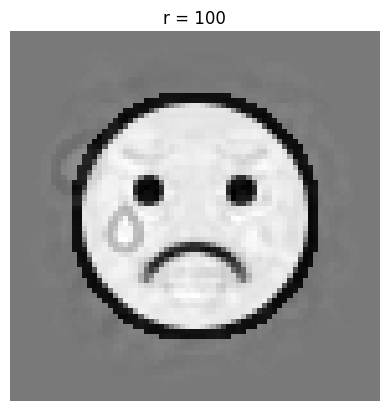

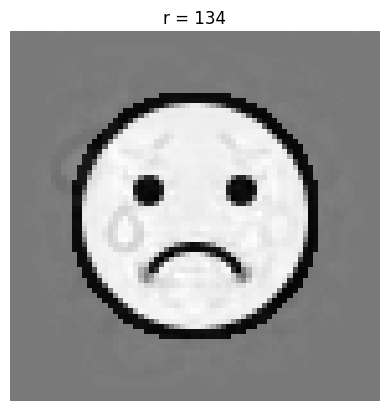

In [60]:
#Load testface and reconstruct it for reference.
#3,4,5,6 come out well
testFace = test_emojis[:,6]
#testFace = emojis[:,1]
plt.imshow(np.reshape(testFace,(m,n)))
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

#Mean subtract test face
testFaceMS = testFace - avgFace

#Generate reconstructions, based on increasing Singular Values
r_list =[0, 20, 50, 80, 100, 134]

for r in r_list:
    reconFace = avgFace + U[:,:r]  @ U[:,:r].T @ testFaceMS
    img = plt.imshow(np.reshape(reconFace,(m,n)))
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()

<p> Emotion Classification, Happy/Sad </p>

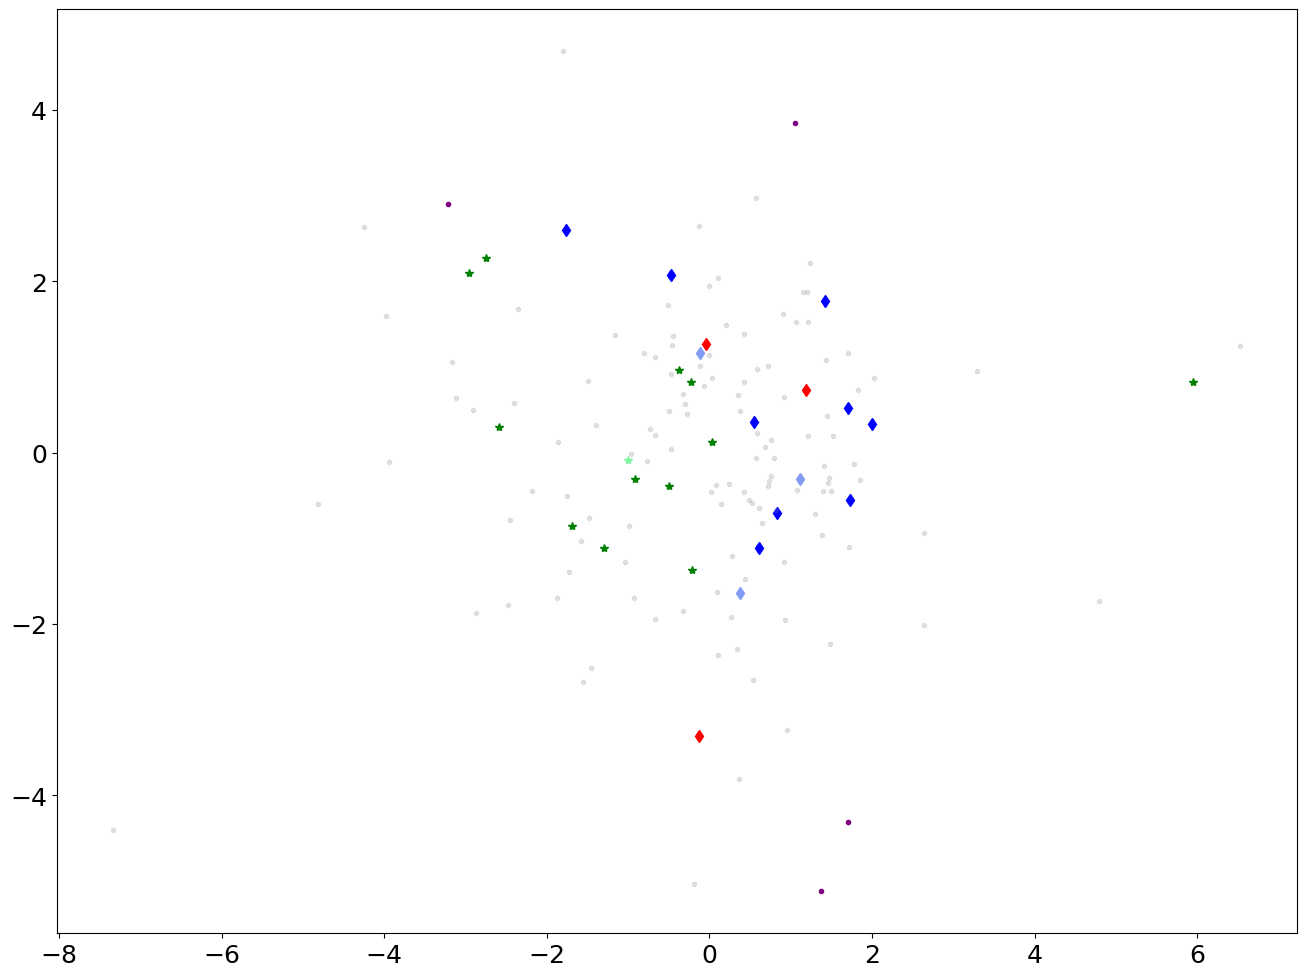

In [138]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

PCAmodes = [9,10] # Project onto PCA modes 9,10

for i in range(1, len(emojis), 1):
    temp = emojis[:,i-1:i]
    temp = temp - np.tile(avgFace,(temp.shape[1],1)).T
    PCACoords = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ temp


    alpha = .2
    emotion = 'gray'
    
    if i in range(5,9,1):
        alpha = 1
        emotion = 'purple'
    elif i in range(29,35,1) or i in range(38,44,1):
        shape = '*'
        alpha = 1
        emotion = 'green'
    elif i in range(47,50,1) or i in range(66,72,1):
        shape = 'd'
        alpha = 1
        emotion = 'blue'
    elif i == 61 or i == 62 or i == 123:
        shape = 'd'
        alpha = 1
        emotion = 'red'
    else:
        shape = '.'
        alpha = .2
        emotion = 'gray'
        
    plt.plot(PCACoords[0,:],PCACoords[1,:],marker=shape,color = emotion, alpha = alpha)

for i in range(1, len(test_emojis), 1):
    temp = test_emojis[:,i-1:i]
    temp = temp - np.tile(avgFace,(temp.shape[1],1)).T
    PCACoords = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ temp


    alpha = 0.2
    emotion = 'gray'

    if i == 5 or i in range(38,44,1):
        shape = '*'
        alpha = 1
        emotion = '#82f5a0'
    elif i in range(2,4,1) or i == 6 or i in range(66,72,1):
        shape = 'd'
        alpha = 1
        emotion = '#829bf5'
    elif i == 61 or i == 62:
        shape = 'd'
        alpha = 1
        emotion = '#eb7f94' 
    else:
        shape = '.'
        alpha = .2
        emotion = 'gray'
        
    plt.plot(PCACoords[0,:],PCACoords[1,:],marker=shape,color = emotion, alpha = alpha)

plt.show()